In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
sns.set(style='darkgrid')

In [3]:
data=pd.read_csv('D:\projects\car_sales_prediction\car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


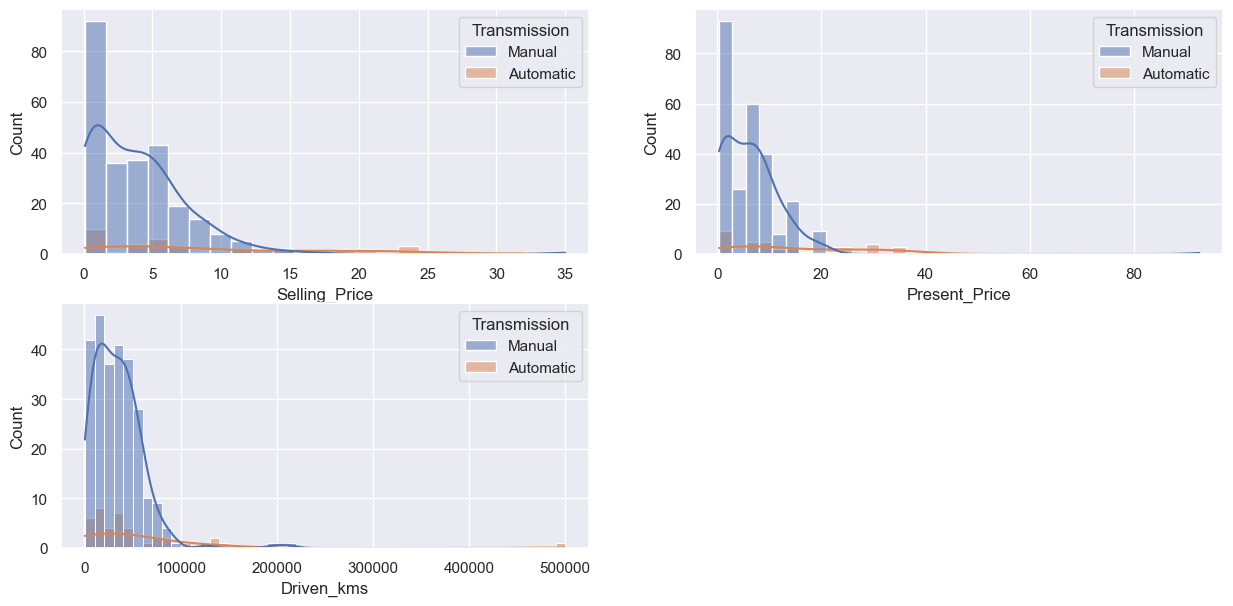

In [8]:
plt.figure(figsize=(15,7))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=data, x=col, kde=True, hue='Transmission')

<Axes: xlabel='Driven_kms', ylabel='Count'>

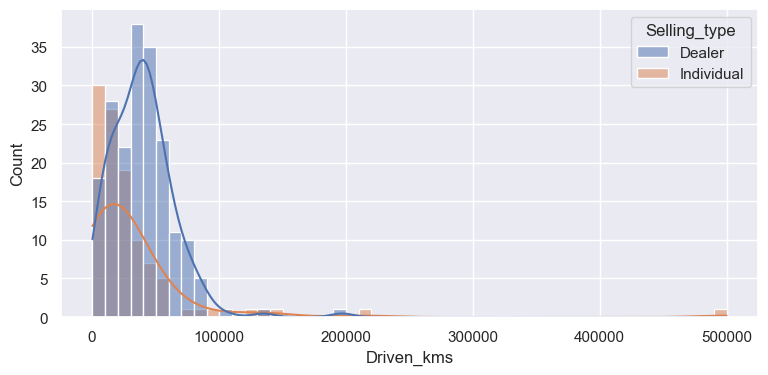

In [9]:
plt.figure(figsize=(9,4))
sns.histplot(data=data, x=col, kde=True, hue='Selling_type')

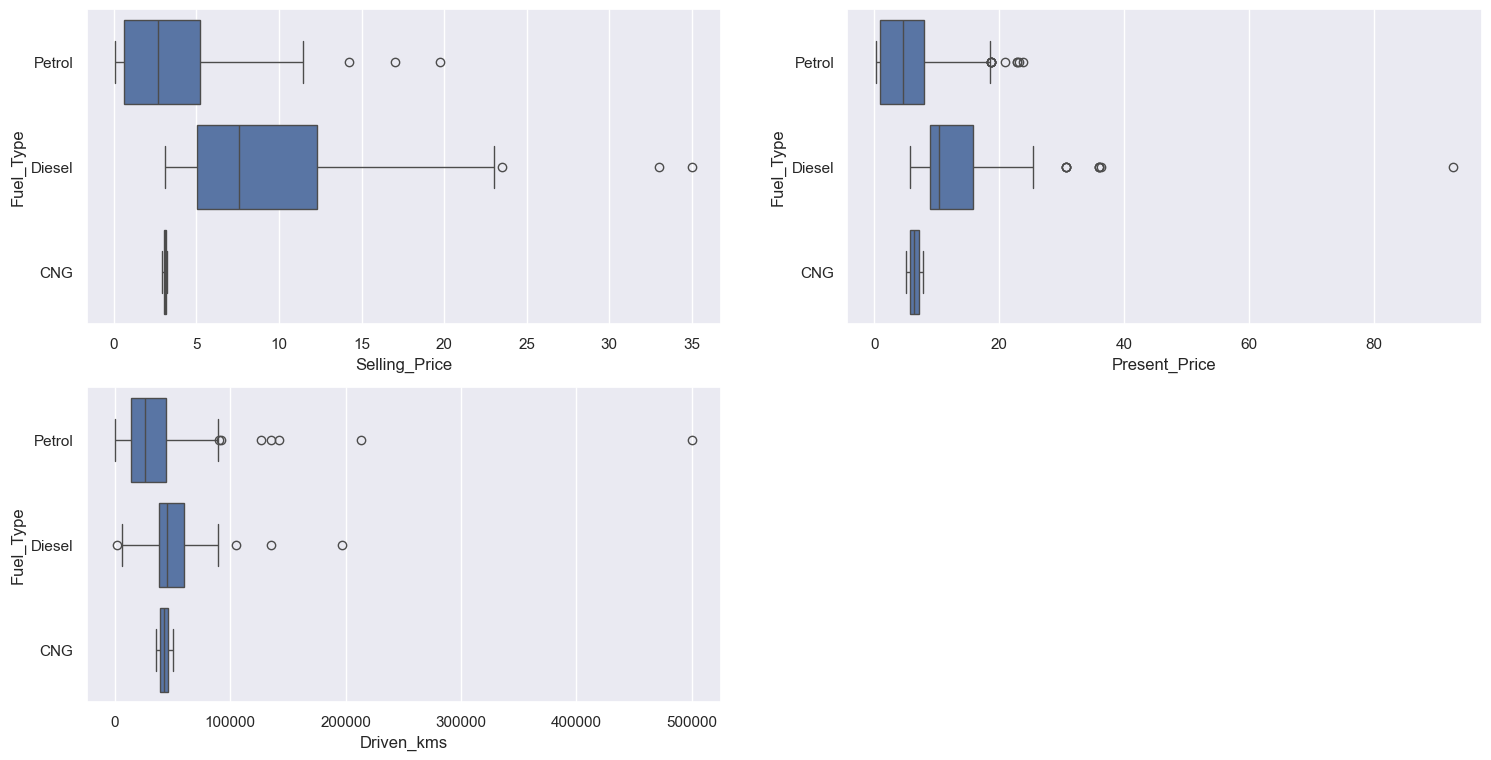

In [10]:
plt.figure(figsize=(18,9))
for i,col in enumerate(['Selling_Price','Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=data, y='Fuel_Type', x=col, orient='h')

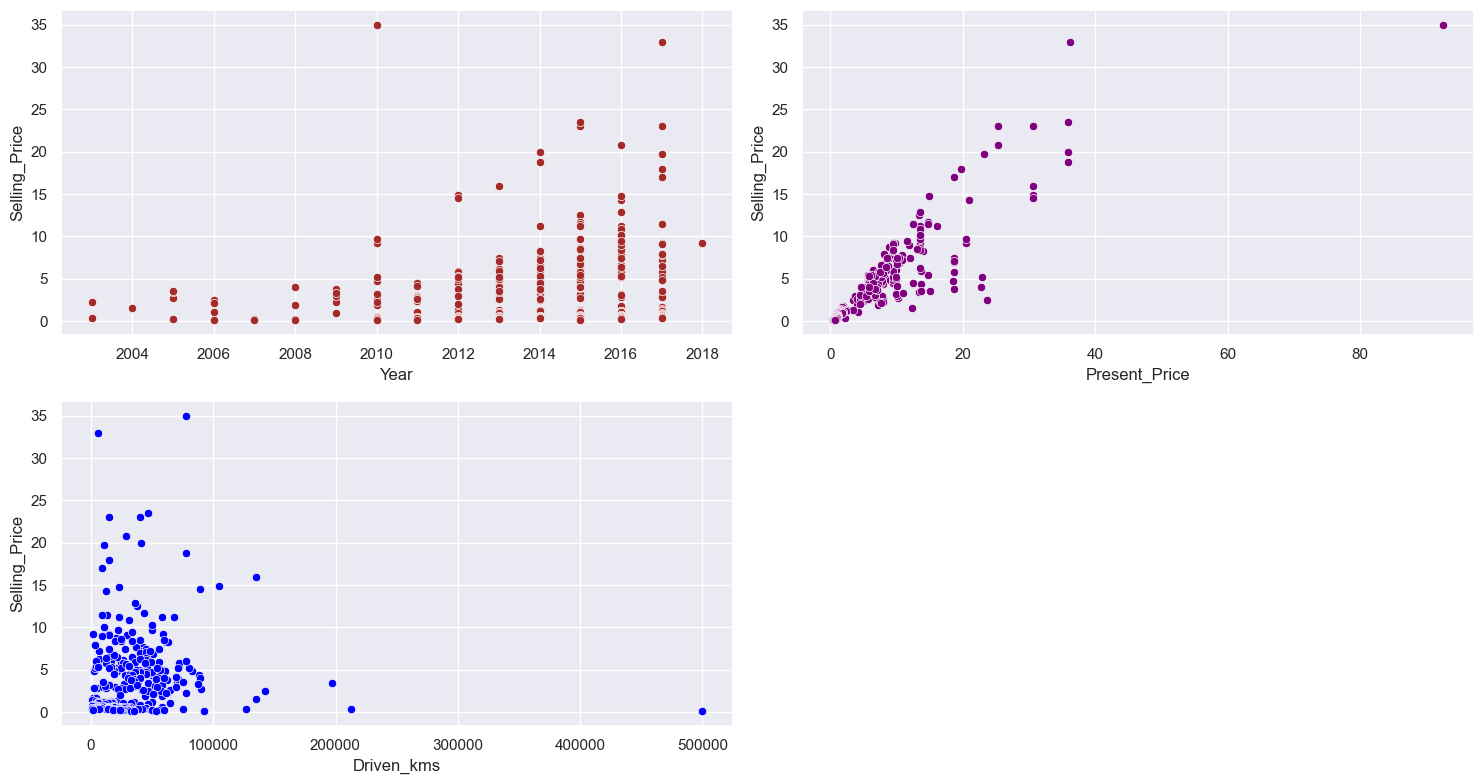

In [11]:
plt.figure(figsize=(15,8))
color=['brown','purple','blue']
for i,col in enumerate(['Year','Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data,x=col,y='Selling_Price',color=color[i])
plt.tight_layout()


In [12]:
def remove_outliers(col):
    d25=data[col].quantile(0.25)
    d75=data[col].quantile(0.75)
    diqr=d75-d25
    upper_lim=d75+1.5*diqr
    lower_lim=d25-1.5*diqr
    filter_data=data[ (data[col] >= lower_lim) & (data[col] <= upper_lim) ]
    return filter_data

data=remove_outliers('Selling_Price')
data=remove_outliers('Present_Price')
data=remove_outliers('Driven_kms')

In [13]:
encoder=LabelEncoder()

encoder.fit(data['Fuel_Type'])
data['Fuel_Type']=encoder.fit_transform(data['Fuel_Type'])
dictft=dict(enumerate(encoder.classes_))
print(dictft)

encoder.fit(data['Selling_type'])
data['Selling_type']=encoder.fit_transform(data['Selling_type'])
dictst=dict(enumerate(encoder.classes_))
print(dictst)

encoder.fit(data['Transmission'])
data['Transmission']=encoder.fit_transform(data['Transmission'])
dicttr=dict(enumerate(encoder.classes_))
print(dicttr)

encoder.fit(data['Car_Name'])
data['Car_Name']=encoder.fit_transform(data['Car_Name'])
dictcn=dict(enumerate(encoder.classes_))
print(dictcn)

data.head()

{0: 'CNG', 1: 'Diesel', 2: 'Petrol'}
{0: 'Dealer', 1: 'Individual'}
{0: 'Automatic', 1: 'Manual'}
{0: 'Activa 3g', 1: 'Activa 4g', 2: 'Bajaj  ct 100', 3: 'Bajaj Avenger 150', 4: 'Bajaj Avenger 150 street', 5: 'Bajaj Avenger 220', 6: 'Bajaj Avenger 220 dtsi', 7: 'Bajaj Avenger Street 220', 8: 'Bajaj Discover 100', 9: 'Bajaj Discover 125', 10: 'Bajaj Dominar 400', 11: 'Bajaj Pulsar  NS 200', 12: 'Bajaj Pulsar 135 LS', 13: 'Bajaj Pulsar 150', 14: 'Bajaj Pulsar 220 F', 15: 'Bajaj Pulsar NS 200', 16: 'Bajaj Pulsar RS200', 17: 'Hero  CBZ Xtreme', 18: 'Hero  Ignitor Disc', 19: 'Hero Extreme', 20: 'Hero Glamour', 21: 'Hero Honda CBZ extreme', 22: 'Hero Honda Passion Pro', 23: 'Hero Hunk', 24: 'Hero Passion Pro', 25: 'Hero Passion X pro', 26: 'Hero Splender Plus', 27: 'Hero Splender iSmart', 28: 'Hero Super Splendor', 29: 'Honda Activa 125', 30: 'Honda Activa 4G', 31: 'Honda CB Hornet 160R', 32: 'Honda CB Shine', 33: 'Honda CB Trigger', 34: 'Honda CB Unicorn', 35: 'Honda CB twister', 36: 'Honda

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,86,2014,3.35,5.59,27000,2,0,1,0
1,89,2013,4.75,9.54,43000,1,0,1,0
2,66,2017,7.25,9.85,6900,2,0,1,0
3,92,2011,2.85,4.15,5200,2,0,1,0
4,88,2014,4.60,6.87,42450,1,0,1,0


In [14]:
X=data.drop(columns=['Selling_Price'],axis=1)
X=X.values
Y=data[['Selling_Price']].values.flatten()

X[:5,],Y[:5]

(array([[8.600e+01, 2.014e+03, 5.590e+00, 2.700e+04, 2.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00],
        [8.900e+01, 2.013e+03, 9.540e+00, 4.300e+04, 1.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00],
        [6.600e+01, 2.017e+03, 9.850e+00, 6.900e+03, 2.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00],
        [9.200e+01, 2.011e+03, 4.150e+00, 5.200e+03, 2.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00],
        [8.800e+01, 2.014e+03, 6.870e+00, 4.245e+04, 1.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00]]),
 array([3.35, 4.75, 7.25, 2.85, 4.6 ]))

In [15]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [16]:
mse_vals=[]
r2_vals=[]
min_mse=np.inf
max_r2=-np.inf
min_mse_n_est=None
max_r2_n_est=None

#from 1 decision tree to 100 decision trees
for i in range(1,101):
    rfr_model=RandomForestRegressor(n_estimators=i,random_state=42)
    rfr_model.fit(x_train, y_train)
    y_test_pred=rfr_model.predict(x_test)
    #MSE
    mse=mean_squared_error(y_test, y_test_pred)
    #R2 SCORE
    r2_sco=r2_score(y_test, y_test_pred)
    #append
    mse_vals.append(mse)
    r2_vals.append(r2_sco)
    #compare
    if mse<min_mse:
        min_mse=mse
        min_mse_n_est=i
    if r2_sco>max_r2:
        max_r2=r2_sco
        max_r2_n_est=i
print('Minimum MSE: {} with {}-estimators'.format(min_mse,min_mse_n_est))
print('Maximum R2 Score: {} with {}-estimators'.format(max_r2,max_r2_n_est))

Minimum MSE: 0.3587487913084846 with 33-estimators
Maximum R2 Score: 0.9661355472028293 with 33-estimators
